In [1]:
import pandas as pd

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

check1 = data['gilded'].apply(lambda x: str(x).isdigit())
check2 = data['score'].apply(lambda x: str(x).isdigit())
check3 = data['ups'].apply(lambda x: str(x).isdigit())

data = data[(check1 == True)]

print 'gilded:', data['gilded'].dtype
print data['gilded'].unique()
print 'score:', data['score'].dtype
print data['score'].unique()
print 'ups:', data['ups'].dtype
print data['ups'].unique()

# data.to_csv(filename, encoding='utf-8', index=False)

gilded: int64
[ 1  2  3  7 11  5  9  4  8]
score: int64
[  24  432  216 ...,  517 1636  879]
ups: int64
[  24  432  216 ...,  517 1636  879]


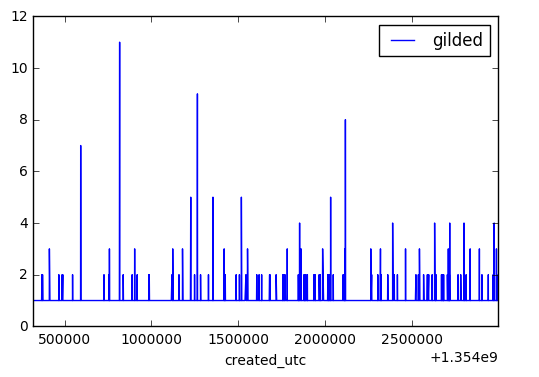

In [2]:
%matplotlib inline

filename = 'Start Data/2012/RC_2012-12_gilded.csv'

data = pd.read_csv(filename)

data.plot(x='created_utc', y='gilded', kind='line')

In [2]:
from scripts import Munger as rh
import pandas as pd
import re

# Testing function for scripts
def containsMD(body):
    heading = r'\W#{1,6}\s'
    emphasis1 = r'\*{1,2}[\s\S]+\*{1,2}'
    emphasis2 = r'_{1,2}[\s\S]+_{1,2}'
    emphasis3 = r'~~[\s\S]+~~'
    superscript = r'\w\^\w'
    unordered = r'\W[\*\-\+]\s\S'
    ordered = r'\W\d\.\s\S'
    url = r'\[[\s\S]+\]\(http[s]?://[\w/\.&=\?;\+\-]+\)'
    code = r'`[\s\S]+`'
    quote = r'(&gt;){1,2}[\s\S]+'

    return (re.search(heading, body) is not None 
       or re.search(emphasis1, body) is not None 
       or re.search(emphasis2, body) is not None
       or re.search(emphasis3, body) is not None
       or re.search(superscript, body) is not None
       or re.search(unordered, body) is not None
       or re.search(ordered, body) is not None
       or re.search(url, body) is not None
       or re.search(code, body) is not None
       or re.search(quote, body) is not None)

# Testing function for scripts
def containsTLDR(body):
    tldr = r'[tT][lL];{0,1}[dD][rR]:{0,1}\s'
    
    return (re.search(tldr, body) is not None)


filename = 'Start Data/2012/RC_2012-01_gilded.csv'

data = pd.read_csv(filename)
test = data[['body']]
test['Contains MD'] = test['body'].apply(lambda x: rh.containsMD(x))
test['Contains tldr'] = test['body'].apply(lambda x: rh.containsTLDR(x))
test
# for text in test[test['Contains tldr'] == True]['body'].values:
#     print '\n----------------------\n', text, '\n----------------------\n'

ImportError: cannot import name Muger

In [4]:
import datetime

def getTimeofDay(data):
    hour = int(datetime.datetime.fromtimestamp(data).strftime("%H"))
    print(hour)
    if hour >= 5 and hour <12:
        print(hour < 12)
        return 'Morning'
    elif hour >= 12 and hour < 17:
        return 'Afternoon'
    elif hour >= 17 and hour < 21:
        return 'Evening'
    elif hour >=21 and hour < 5:
        return 'Night'
    
print(getTimeofDay(1393632172))

18
Evening


In [40]:
from scripts import Munger as mg
import datetime
import pandas as pd

data = pd.read_csv('W:/CSCE489/Start Data/test/RC_2015-01_toplevel_funny.csv')

data['body'] = data['body'].astype(str)

data['gilded'] = data['gilded'].astype(bool)

data['Contains MD'] = data['body'].apply(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].apply(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].apply(lambda x: mg.wordcount(x))
data['Emoji Count'] =data['body'].apply(lambda x: mg.emojicount(x))
data['Time of Day'] =data['created_utc'].apply(lambda x: mg.getTimeofDay(x))

In [41]:
data.head()

,archived,author,author_flair_css_class,author_flair_text,body,controversiality,created_utc,distinguished,downs,edited,...,score,score_hidden,subreddit,subreddit_id,ups,Contains MD,Contains tldr,Word Count,Emoji Count,Time of Day
0,False,deephaven,NaN,NaN,Wheredugit?,0,1420070401,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,1,0,Evening
1,False,[deleted],NaN,NaN,[deleted],0,1420070402,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,1,0,Evening
2,False,Fusionism,NaN,NaN,I liked the part where the pizzas are wiggling...,0,1420070408,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,10,0,Evening
3,False,LOHare,NaN,NaN,"If you're tired enough, any surface is a comfy...",0,1420070413,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,10,0,Evening
4,False,[deleted],NaN,NaN,This just made me realize new years for me is ...,0,1420070413,NaN,0,False,...,1,False,funny,t5_2qh33,1,False,False,34,0,Evening


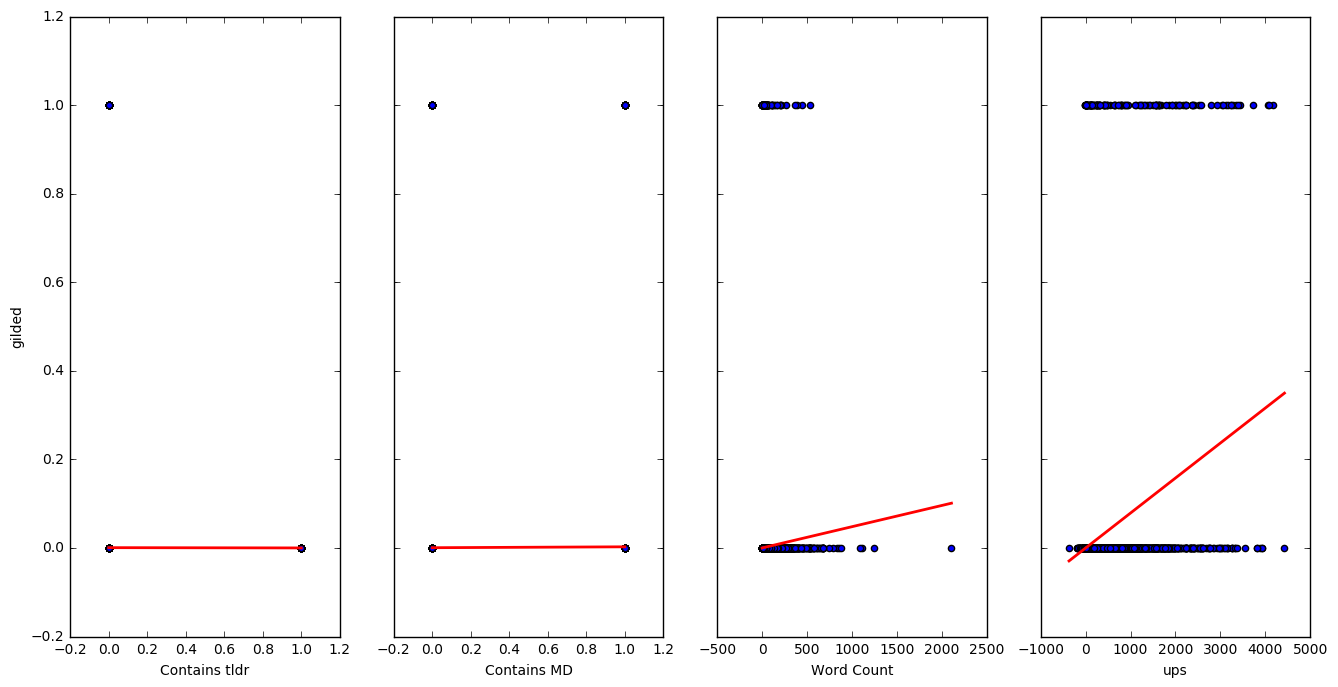

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()

data['gilded'] = data['gilded'].astype(bool)

# visualize the relationship between the features and the response using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True,  figsize=(16, 8))
data.plot(kind='scatter', x='Contains tldr', y='gilded', ax=axs[0])
X_new = pd.DataFrame({'Contains tldr': [data['Contains tldr'].min(), data['Contains tldr'].max()]})
lm_in_sklearn.fit(data[['Contains tldr']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[0].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Contains MD', y='gilded', ax=axs[1])
X_new = pd.DataFrame({'Contains MD': [data['Contains MD'].min(), data['Contains MD'].max()]})
lm_in_sklearn.fit(data[['Contains MD']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[1].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='Word Count', y='gilded', ax=axs[2])
X_new = pd.DataFrame({'Word Count': [data['Word Count'].min(), data['Word Count'].max()]})
lm_in_sklearn.fit(data[['Word Count']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[2].plot(X_new, preds, c='red', linewidth=2)

data.plot(kind='scatter', x='ups', y='gilded', ax=axs[3])
X_new = pd.DataFrame({'ups': [data['ups'].min(), data['ups'].max()]})
lm_in_sklearn.fit(data[['ups']], data['gilded'])
preds = lm_in_sklearn.predict(X_new)
axs[3].plot(X_new, preds, c='red', linewidth=2)


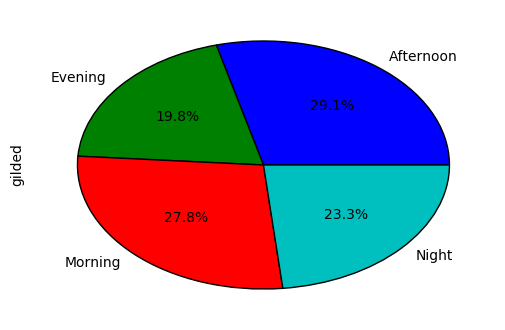

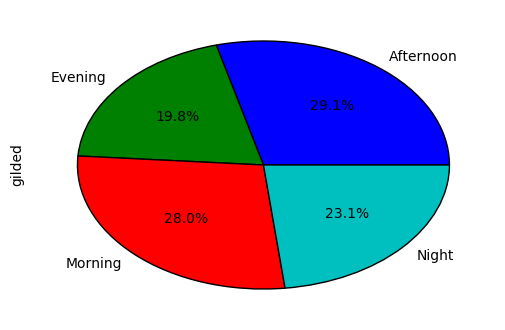

In [10]:
data.groupby('Time of Day')[['gilded']].count().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

data.groupby('Time of Day')[['gilded']].sum().plot(kind='pie',y='gilded', autopct='%1.1f%%', legend=False)

In [8]:
X = data[['Word Count']]
y = data['gilded']

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm_in_sklearn = LinearRegression()
lm_in_sklearn.fit(X, y)

# print intercept and coefficients
print "Intercept = ", lm_in_sklearn.intercept_
print "Coefficient = ", lm_in_sklearn.coef_

# calculate the R-squared
print 'R-squared = ', lm_in_sklearn.score(X, y)

Intercept =  1.03571120893
Coefficient =  [ 0.00027689]
R-squared =  0.0107459920164


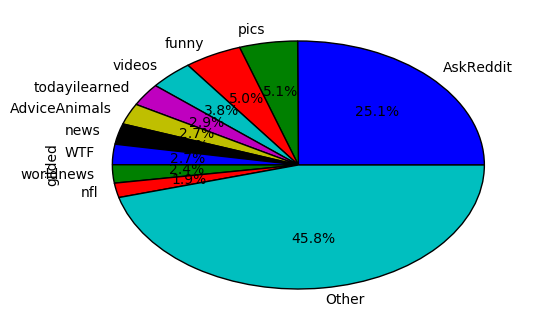

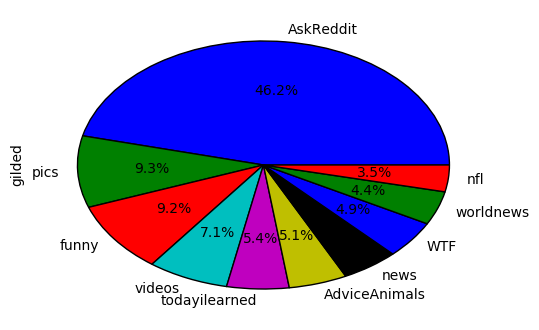

In [14]:
topsum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10).sum()
remaindersum = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=True).head(-10).sum()

top = data.groupby('subreddit')[['gilded']].count().sort_values('gilded', ascending=False).head(10)
top.append(pd.DataFrame([(remaindersum-topsum)], columns=['gilded'], index=['Other'])).plot(kind='pie', y='gilded', autopct='%1.1f%%', legend=False)
top.plot(kind='pie', y='gilded', autopct='%1.1f%%', legend=False)

C:\Users\jsmoo\Anaconda2\envs\cs489\lib\site-packages\ipykernel\__main__.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Feature ranking:
1. ups (0.617178)
2. Word Count (0.348381)
3. Time of Day (0.028272)
4. Contains MD (0.006071)
5. Contains tldr (0.000097)
6. Emoji Count (0.000000)


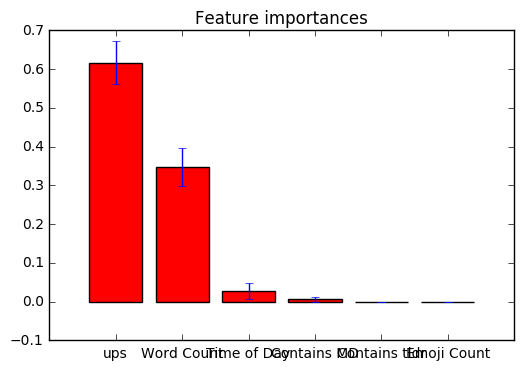

In [38]:
import numpy as np
import matplotlib.pyplot as plt

from scripts import Munger as mg

from sklearn.datasets import make_classification
from sklearn.ensemble import ExtraTreesClassifier

data = pd.read_csv('W:/CSCE489/Start Data/test/RC_2015-01_toplevel_funny.csv')

data['body'] = data['body'].astype(str)

# Munge data
data['Contains MD'] = data['body'].map(lambda x: mg.containsMD(x))
data['Contains tldr'] = data['body'].map(lambda x: mg.containsTLDR(x))
data['Word Count'] = data['body'].map(lambda x: mg.wordcount(x))
data['Emoji Count'] = data['body'].map(lambda x: mg.emojicount(x))
data['Time of Day'] = data['created_utc'].map(lambda x: mg.getTimeofDay(x))

todmap = {
    'Afternoon': 1,
    'Evening': 2,
    'Night': 3,
    'Morning': 4
}

X = data[['ups' ,'Contains MD', 'Contains tldr', 'Word Count', 'Emoji Count', 'Time of Day']]
X['Time of Day'] = X['Time of Day'].map(todmap)
y = data['gilded'].astype(bool)
                            
# Build a forest and compute the feature importances
forest = ExtraTreesClassifier(n_estimators=250,
                              random_state=0)

forest.fit(X, y)
importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print '%d.' % (f + 1), X.columns.values[indices[f]], '(%f)' % importances[indices[f]]

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X.shape[1]), [ X.columns.values[i] for i in indices])
plt.xlim([-1, X.shape[1]])
plt.show()

[False True]
